# DB SCAN - Reverse pedagogy
Giuliano RICCARDI - Victor ROBIC

## 1. Intro
**DBSCAN** stands for "**Density-Based Spatial Clustering of Applications with Noise**". It is a clustering algorithm that identifies clusters by taking into account the density of the data points in space. This allows for a more flexible clustering that perfoms better than other algorithms when dealing with nested data. Furthermore, DBSCAN also handles exceptionally well outliers and noise in data since it only affects a point to a cluster if it is within a dense region. 

Just like K-Means algorithm, DBSCAN uses a distance metric in its execution. Because of this, it is **essential** for us to work with **scaled data** so all the features studied are treated as equally important. Also, this algorithm eliminates the need of specifying before hand the amount of clusters we want, DBSCAN **automatically detects** the optimum amount of clusters for its given parameters.

DBSCAN can still perform well identifying clusters and outliers when working with multiple dimensions, making it an even more appealing solution for multidimensional problems.

<u>A little bit of history</u>: DBSCAN algorithm was created in 1996 by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiawei Xu. 

**Clustering**: a technique in unsupervised machine learning that involves grouping a set of observations in such a way that oservations in the same group (cluster) are more similar to each other than to those in other groups. The goal being to discover natural groupings within the studied data.

**Nested data**: said of data when clusters are wrap around one another.

Example:

![Nested Data](./img/3.png)



## 2. Theory

To better understand how the DBSCAN algorithm works, let us start with the definitions of the important notions linked to it.

**Epsilon**: the radius of the neighboorhood around a point. It defines the maximum distance (usually Euclidean distance) at which a point will be considered the neighboor to another one.

**MinPts**: the minimum amount of points needed to form a dense region.

**Dense Region**: a region containing at least MinPts within it.

**Sparse Region**: said of a region that contains points but not enough to be considered a Dense Region.

**Core Point**: said of a data point if there is at least a minimum number of points (MinPts) within a radius Epsilon around it.   

**Border Point**: said of a data point if the point is not a Core Point but lies within a radius Epsilon of a Core Point. 

**Noise Point**: said of a data point if it is neither a Core nor a Border Point. They are considered the outliers and do not belong to any cluster.

![Different Kind of Points](./img/4.png)

## 3. Algorithm Steps

1. Select a point randomly
2. Retrieve all points within an **Epsilon** distance of this point
3. If the point is a **Core Point**, a cluster is formed. If it isn't a Core Point it is labeled as **Noise**
4. Iterate through the cluster adding any point within Epsilon distance of a Core Point to the cluster
5. **Repeat** until all points have been processed

Video Explanation by : **StatQuest with Josh Starmer**

![Gif Illustration for DBSCAN](./img/5.gif)

Full video at: https://www.youtube.com/watch?v=RDZUdRSDOok

Notes: 

We can say that Core Points **extend** the clusters since we will assign every point within Epsilon distance of it to the cluster it belongs to, whereas the Border Points can only be **assigned** to clusters.

Cluster creation is done in **sequence**, this means that if a border point is within Epsilon distance of a Core Point from cluster 1 and a Core Point from cluster 2, it will be assigned to the cluster that the algorithm **first** iterated through.

## Lab

In this part, we are going to apply DBSCAN algorithm and then, the KMeans clustering algorithm in order to compare.

First, we load the image and then, we resize the image by dividing by 2 its dimensions.

In [1]:
from PIL import Image
import numpy as np
image = Image.open('img/butterfly.jpeg')

In [2]:
height = int(image.height/2)
width = int(image.width/2)

In [3]:
image.resize((width,height)).save('img/butterfly_resized.jpeg')

Let's normalize the data by dividing it by 255

In [4]:
from matplotlib import image
import cv2
I = image.imread('img/butterfly.jpeg',)/255
np.isnan(I).any()

False

Let's compute the normalized green-red difference in order to group the two variables into one.

In [16]:
[M,N]=I.shape[:2]

f = (I[:,:,1]-I[:,:,0])/(I[:,:,1]+I[:,:,0])
f = 0.5*(f+1)
f=np.nan_to_num(f)

/var/folders/db/tl_jqtf15mx_t5hg0zwn60qm0000gn/T/ipykernel_78373/897505983.py:3: RuntimeWarning: invalid value encountered in divide
  f = (I[:,:,1]-I[:,:,0])/(I[:,:,1]+I[:,:,0])


Now, let's try to apply the DBSCAN algorithm

In [8]:
from sklearn.cluster import DBSCAN

k=0
X = np.zeros([M*N,2])
for i in range(M):    
    for j in range(N):        
        X[k,:]=[I[i,j,2],f[i,j]]
        k= k+1

dbscan = DBSCAN(eps=0.0001, min_samples=5).fit(X)
labels = dbscan.labels_
L = np.reshape(labels+1,[M,N])/2

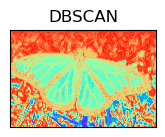

In [10]:
import matplotlib.pyplot as plt

plt.subplot(2,3,4)
plt.imshow(L,cmap='rainbow_r') 
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('DBSCAN');

We decrease the eps to see the differences

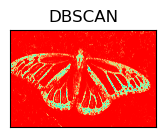

In [23]:
k=0
X = np.zeros([M*N,2])
for i in range(M):    
    for j in range(N):        
        X[k,:]=[I[i,j,2],f[i,j]]
        k= k+1

dbscan = DBSCAN(eps=0.0001, min_samples=500).fit(X)
labels = dbscan.labels_
L = np.reshape(labels+1,[M,N])/2

plt.subplot(2,3,4)
plt.imshow(L,cmap='rainbow_r') 
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('DBSCAN');

We remark that the edges are less precise in the second image because it takes in account more neighboors around the point.

Use KMeans to compare with DBSCAN algorithm

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
L = np.reshape(labels+1,[M,N])/2

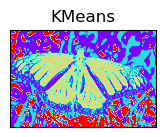

In [28]:
import matplotlib.pyplot as plt

plt.subplot(2,3,4)
plt.imshow(L,cmap='rainbow_r') 
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('KMeans');

We remark that the precision is not better by using the KMeans algorithm. In order to increase the precision, let's now try a different method to prepare data.

In [30]:
from PIL import Image

image = Image.open('img/bateau.jpeg')
image2 = Image.open('img/butterfly.jpeg')

In [31]:
height = int(image.height/2)
width = int(image.width/2)
height2=int(image2.height/2)
width2=int(image2.width/2)

In [32]:
image.resize((width,height)).save('img/bateau_resized.jpeg')
image2.resize((width2,height2)).save("img/buterfly_resized.jpeg")

In [33]:
from matplotlib import image

I = image.imread('img/bateau_resized.jpeg')
I2 = image.imread("img/buterfly_resized.jpeg")

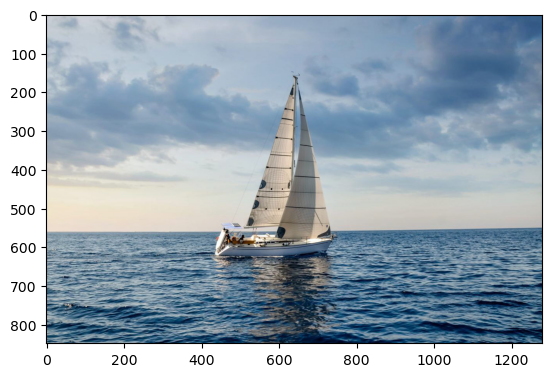

In [34]:
plt.imshow(I)

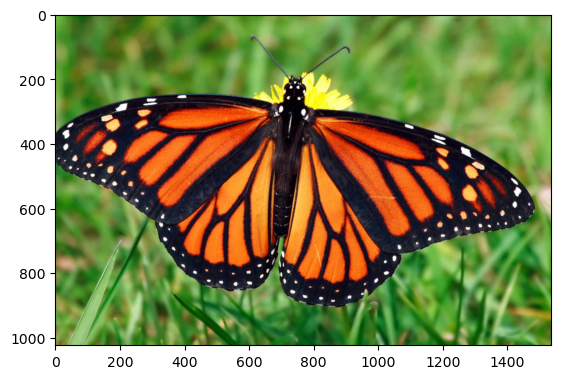

In [35]:
plt.imshow(I2)

In [36]:
data = I2.astype('float32')
data_2D = data.reshape(height2*width2, 3)
data_2D.shape

(1572864, 3)

In [37]:
km = KMeans(
    n_clusters = 3,
    random_state = 20201033
)

km.fit(data_2D)

KMeans(n_clusters=3, random_state=20201033)

In [38]:
clusters = km.predict(data_2D)
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [39]:
Xsegmentation = np.empty_like(data_2D)
for i in range(data_2D.shape[0]):
    Xsegmentation[i] = km.cluster_centers_[clusters[i]]

In [40]:
km.cluster_centers_[clusters]

array([[106.36656, 152.29187,  65.03911],
       [106.36656, 152.29187,  65.03911],
       [106.36656, 152.29187,  65.03911],
       ...,
       [106.36656, 152.29187,  65.03911],
       [106.36656, 152.29187,  65.03911],
       [106.36656, 152.29187,  65.03911]], dtype=float32)

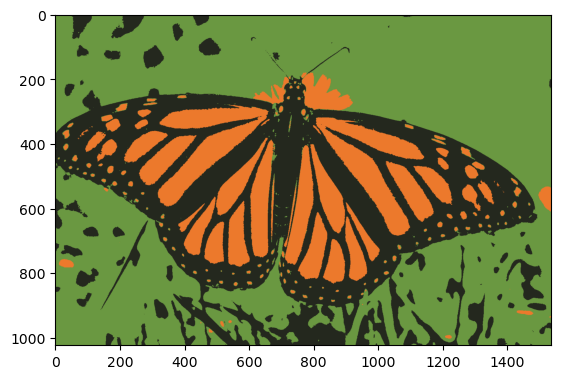

In [41]:
plt.imshow(np.uint8(Xsegmentation.reshape(height2, width2, 3)))

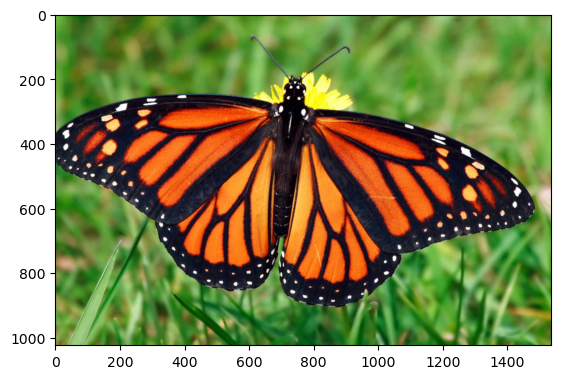

In [42]:
plt.imshow(I2)

In [43]:
dbscan = DBSCAN(
    eps = 0.000001,
    min_samples = 5,
).fit(data_2D)

labels = dbscan.labels_

In [44]:
L = np.reshape(labels+1, [height2, width2])/2

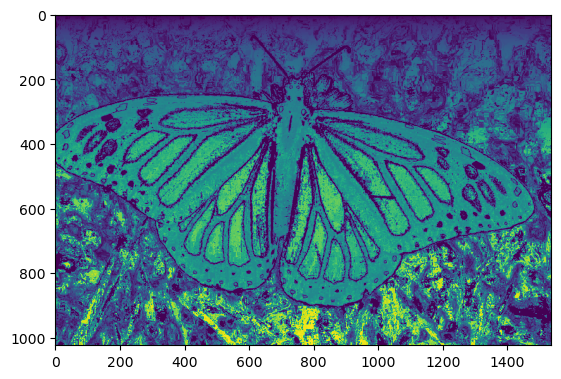

In [45]:
plt.imshow(L)

## Sources
[DBSCAN, a density-based algorithm for discovering clusters](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf?source=post_page---------------------------)

[Video : Clustering with DBSCAN, clearly explained](https://youtu.be/RDZUdRSDOok?si=CPiHvumMMTC0OkmW)